In [1]:
from keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Concatenate, GlobalMaxPooling2D, Dropout, Dense, Lambda, Reshape, Activation, Multiply, Add
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications import VGG19
from keras import backend as K
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

2024-04-18 22:32:54.501778: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


100%|██████████| 186/186 [00:00<00:00, 193.92it/s]


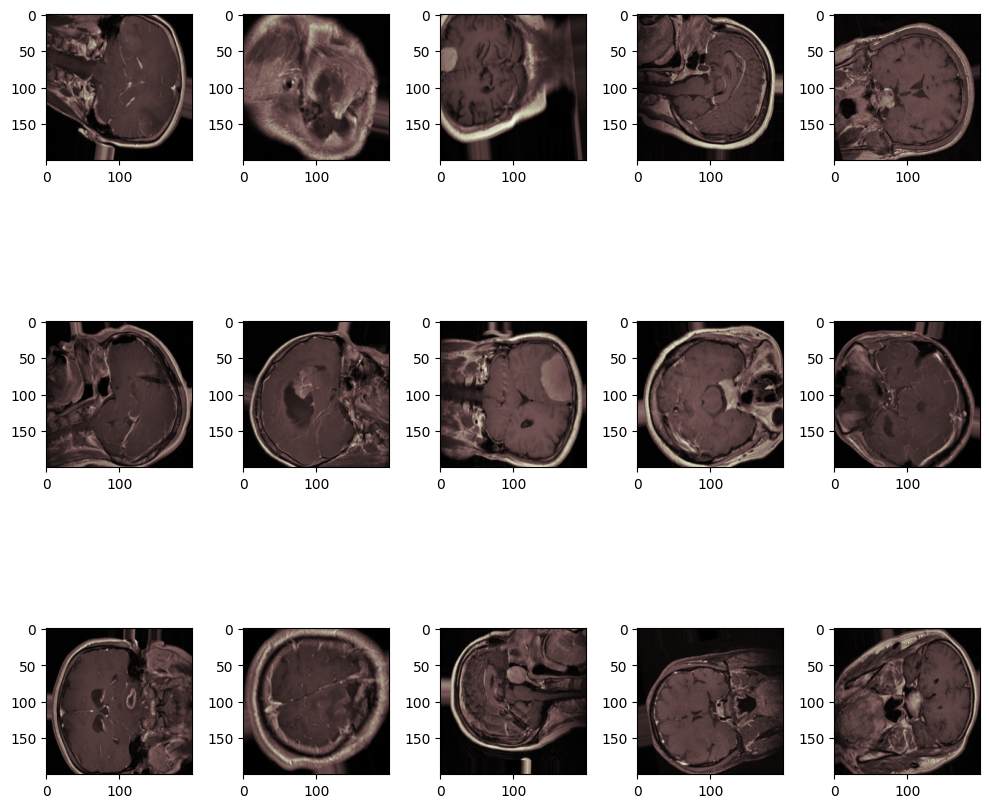

In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

xxx

In [5]:
def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    k = ReLU()(x)
    

    x = MaxPooling2D()(k)
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    j = ReLU()(x)
    
    x = MaxPooling2D()(j)
    x = Conv2D(512, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model


2024-04-18 19:20:32.103692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 19:20:32.404868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:02:00.0, compute capability: 8.9


Epoch 1/50


2024-04-18 19:20:39.565677: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-04-18 19:20:40.442368: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-04-18 19:20:40.442405: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-04-18 19:20:40.442596: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-04-18 19:20:40.924673: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.5984 - accuracy: 0.7502
Epoch 1: val_accuracy improved from -inf to 0.37571, saving model to model-test.h5
Epoch 1: 9.49 seconds
264/264 [==============================] - 9s 21ms/step - loss: 0.5984 - accuracy: 0.7502 - val_loss: 3.0878 - val_accuracy: 0.3757 - lr: 1.0000e-04
Epoch 2/50
261/264 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.8318
Epoch 2: val_accuracy improved from 0.37571 to 0.47249, saving model to model-test.h5
Epoch 2: 4.70 seconds
264/264 [==============================] - 5s 18ms/step - loss: 0.4176 - accuracy: 0.8318 - val_loss: 3.8528 - val_accuracy: 0.4725 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8627
Epoch 3: val_accuracy improved from 0.47249 to 0.65750, saving model to model-test.h5
Epoch 3: 4.68 seconds
264/264 [==============================] - 5s 18ms/step - loss: 0.3505 - accuracy: 0.8623 - val_loss: 0.

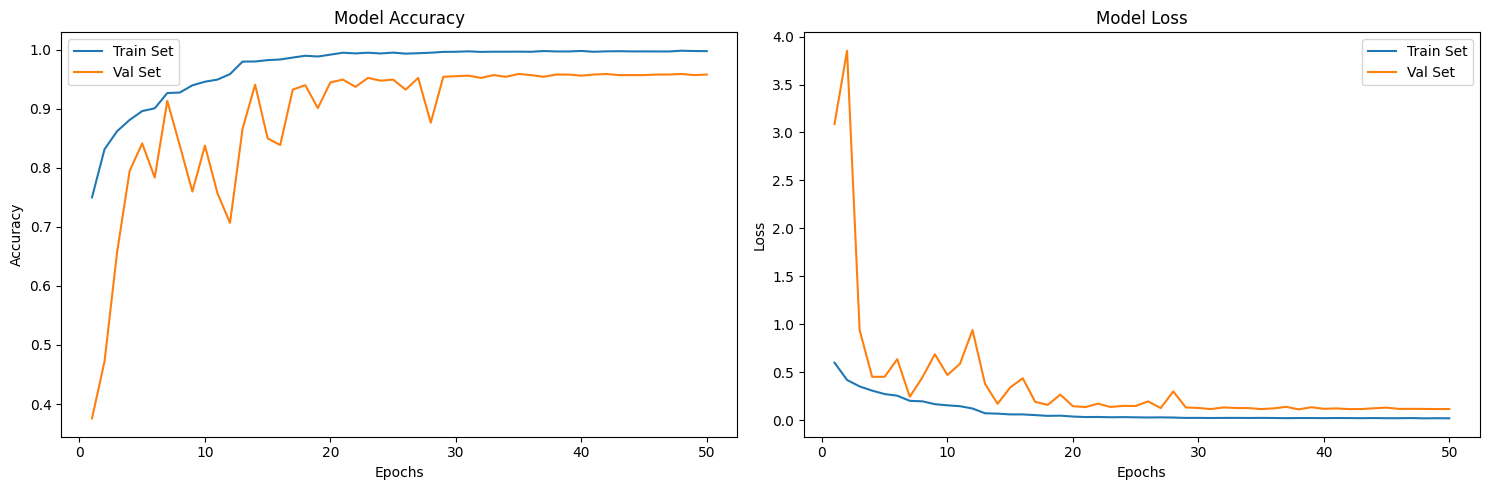

20/20 [==============================] - 0s 6ms/step - loss: 0.1429 - accuracy: 0.9479
Test Accuracy:  94.79
              precision    recall  f1-score   support

      glioma     0.9783    0.9476    0.9627       286
  meningioma     0.8675    0.9225    0.8942       142
   pituitary     0.9677    0.9677    0.9677       186

    accuracy                         0.9479       614
   macro avg     0.9379    0.9459    0.9415       614
weighted avg     0.9495    0.9479    0.9484       614



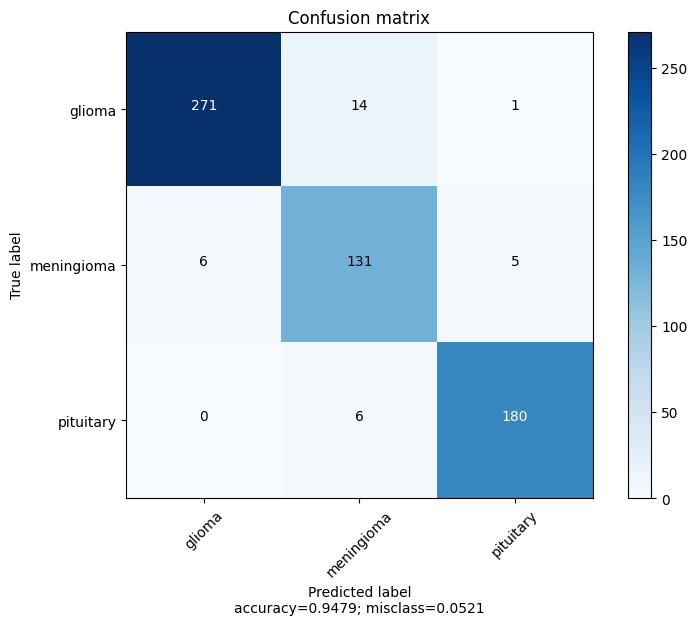

In [6]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

cxx

In [6]:
def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    x = Concatenate()([ Conv2D(32, 5, strides=4, padding='same')(y), x])
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    k = ReLU()(x)

    x = MaxPooling2D()(k)
    x = Concatenate()([ Conv2D(32, 9, strides=8, padding='same')(y), Conv2D(64, 5, strides=4, padding='same')(z),  x])
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    j = ReLU()(x)
    
    x = MaxPooling2D()(j)
    x = Concatenate()([ Conv2D(64, 9, strides=8, padding='valid')(z), Conv2D(128, 5, strides=4, padding='valid')(k),  x])
    x = Conv2D(512, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.6965 - accuracy: 0.7172
Epoch 1: val_accuracy improved from -inf to 0.48387, saving model to model-test.h5
Epoch 1: 9.27 seconds
264/264 [==============================] - 9s 32ms/step - loss: 0.6961 - accuracy: 0.7174 - val_loss: 2.9514 - val_accuracy: 0.4839 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4620 - accuracy: 0.8171
Epoch 2: val_accuracy did not improve from 0.48387
Epoch 2: 7.97 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.4626 - accuracy: 0.8168 - val_loss: 5.3472 - val_accuracy: 0.4602 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8529
Epoch 3: val_accuracy improved from 0.48387 to 0.89469, saving model to model-test.h5
Epoch 3: 8.06 seconds
264/264 [==============================] - 8s 31ms/step - loss: 0.3735 - accuracy: 0.8529 - val_loss: 0.2826 - val_accuracy: 0.8

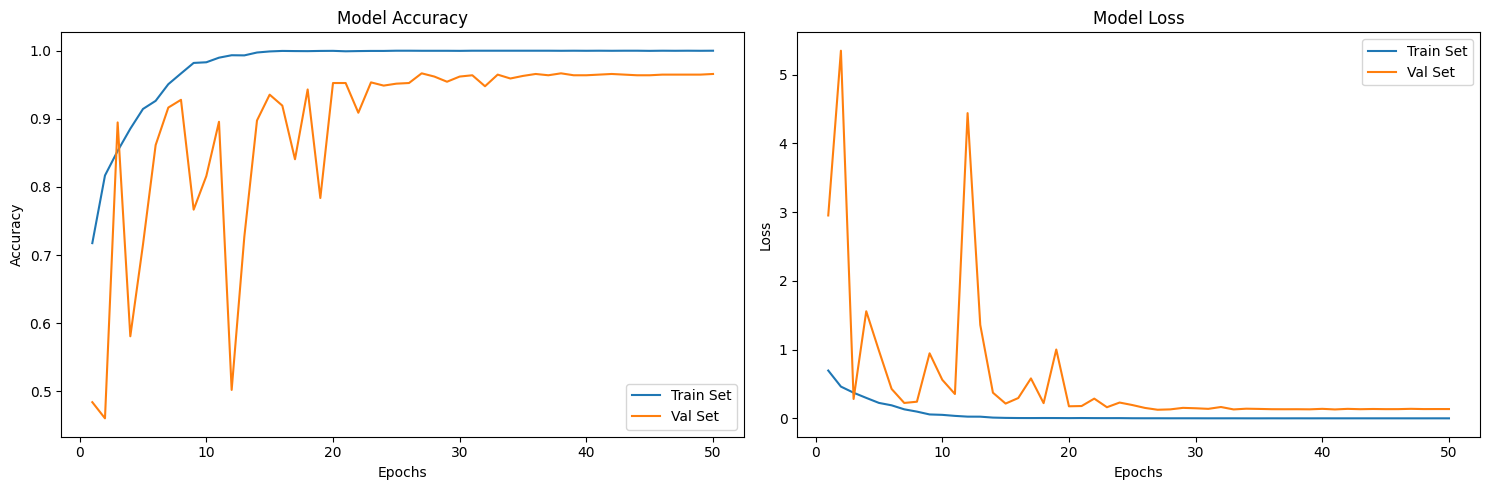

20/20 [==============================] - 0s 9ms/step - loss: 0.1570 - accuracy: 0.9528
Test Accuracy:  95.28
              precision    recall  f1-score   support

      glioma     0.9819    0.9476    0.9644       286
  meningioma     0.8859    0.9296    0.9072       142
   pituitary     0.9630    0.9785    0.9707       186

    accuracy                         0.9528       614
   macro avg     0.9436    0.9519    0.9474       614
weighted avg     0.9540    0.9528    0.9531       614



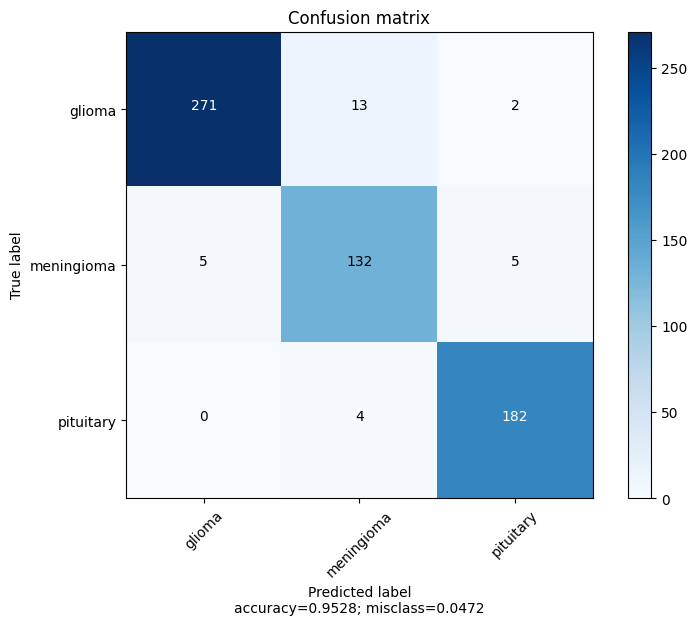

In [13]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

xax

In [27]:
def channel_attention(inputs, reduction=8):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // reduction, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def new_attention(inputs):

    b, h, w, c = inputs.shape.as_list()

    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(inputs)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(inputs)

    x = tf.reshape(x, [-1, 1, h*w])
    y = tf.reshape(y, [-1, 1, h*w])

    x = K.batch_dot(x, tf.reshape(inputs, [-1, h*w, c]))
    y = K.batch_dot(y, tf.reshape(inputs, [-1, h*w, c]))

    x = tf.reshape(x, [-1, 1, 1, c])
    y = tf.reshape(y, [-1, 1, 1, c])

    z = Multiply()([x, y])
    x = Activation('sigmoid')(z)

    y = channel_attention(inputs)
    x = Add()([x, y])
    
    x = Multiply()([x, inputs])

    return x

def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    k = ReLU()(x)
    

    x = MaxPooling2D()(k)
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    j = ReLU()(x)
    
    x = MaxPooling2D()(j)
    x = Conv2D(512, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = new_attention(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model


Epoch 1/50
262/264 [============================>.] - ETA: 0s - loss: 0.6699 - accuracy: 0.7292
Epoch 1: val_accuracy improved from -inf to 0.48387, saving model to model-test.h5
Epoch 1: 6.10 seconds
264/264 [==============================] - 6s 21ms/step - loss: 0.6677 - accuracy: 0.7301 - val_loss: 2.8711 - val_accuracy: 0.4839 - lr: 1.0000e-04
Epoch 2/50
262/264 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8385
Epoch 2: val_accuracy improved from 0.48387 to 0.52372, saving model to model-test.h5
Epoch 2: 5.01 seconds
264/264 [==============================] - 5s 19ms/step - loss: 0.4205 - accuracy: 0.8382 - val_loss: 7.2302 - val_accuracy: 0.5237 - lr: 1.0000e-04
Epoch 3/50
262/264 [============================>.] - ETA: 0s - loss: 0.3600 - accuracy: 0.8595
Epoch 3: val_accuracy improved from 0.52372 to 0.65844, saving model to model-test.h5
Epoch 3: 5.03 seconds
264/264 [==============================] - 5s 19ms/step - loss: 0.3591 - accuracy: 0.8597 - v

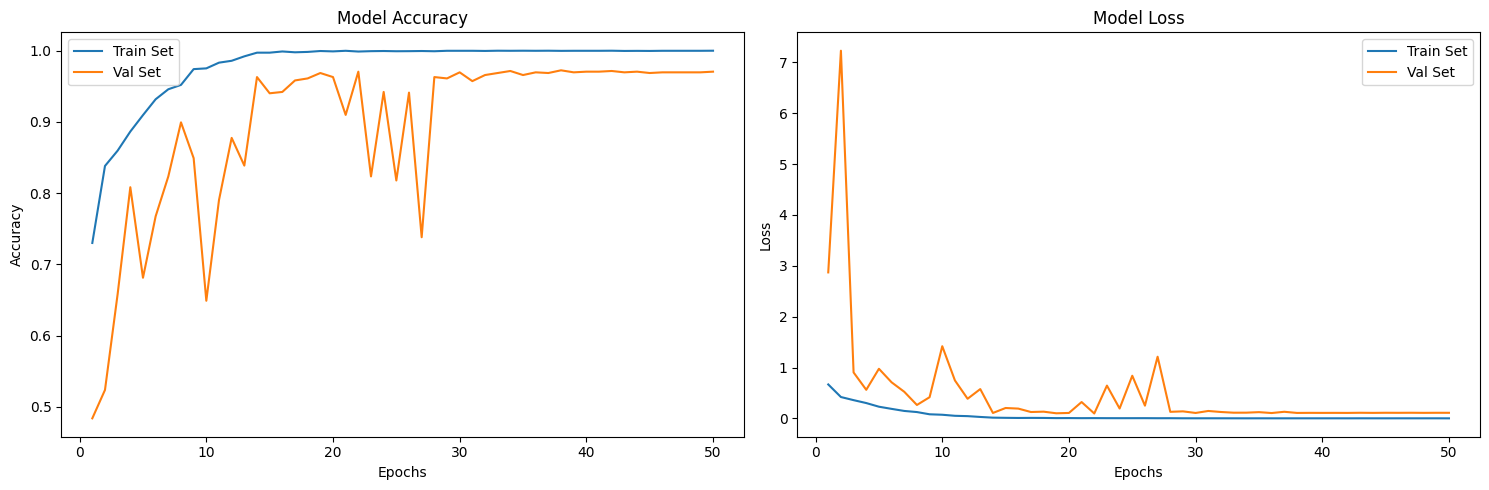

20/20 [==============================] - 0s 6ms/step - loss: 0.1046 - accuracy: 0.9625
Test Accuracy:  96.25
              precision    recall  f1-score   support

      glioma     0.9719    0.9685    0.9702       286
  meningioma     0.9231    0.9296    0.9263       142
   pituitary     0.9785    0.9785    0.9785       186

    accuracy                         0.9625       614
   macro avg     0.9578    0.9589    0.9583       614
weighted avg     0.9626    0.9625    0.9626       614



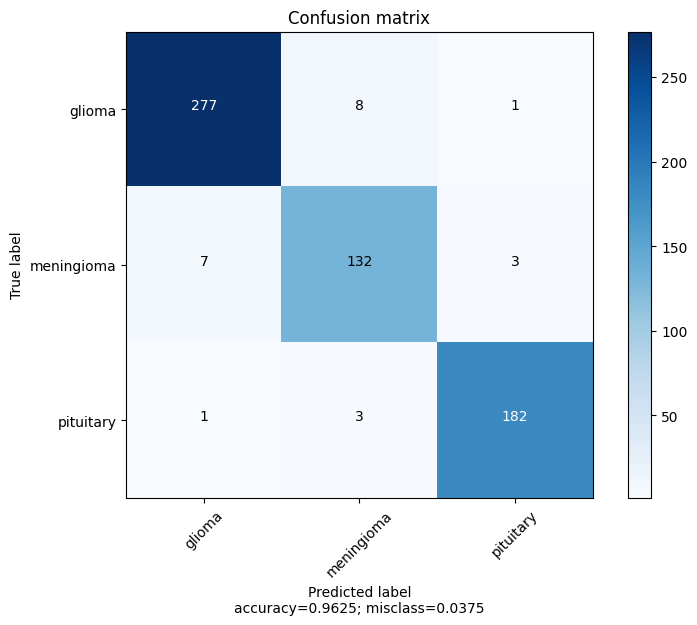

In [30]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

xxb

In [23]:
def block(inputs, filters):

    m = Conv2D(filters, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)

    a = Conv2D(filters, 3, padding='same')(inputs)
    a = BatchNormalization()(a)
    a = ReLU()(a)
    
    b = Concatenate()([m, a])

    d = Conv2D(filters * 2, 3, padding='same')(b)
    d = BatchNormalization()(d)
    d = ReLU()(d)

    d = Conv2D(filters * 2, 3, padding='same')(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    
    x = Concatenate()([b, d])

    m = Conv2D(filters*4, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)
    
    x = Add()([m, x])

    y = Conv2D(filters*2, 1)(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    
    return y

def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    k = block(x, 64)
    

    x = MaxPooling2D()(k)
    j = block(x, 128)
    
    x = MaxPooling2D()(j)
    x = block(x, 256)
    
    
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

2024-04-18 23:06:53.604799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 23:06:53.916589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:42:00.0, compute capability: 8.9


Epoch 1/50


2024-04-18 23:07:01.072257: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-04-18 23:07:01.853553: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-04-18 23:07:01.853591: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-04-18 23:07:01.853731: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-04-18 23:07:02.363071: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.7227
Epoch 1: val_accuracy improved from -inf to 0.33207, saving model to model-test.h5
Epoch 1: 13.51 seconds
264/264 [==============================] - 14s 34ms/step - loss: 0.6785 - accuracy: 0.7227 - val_loss: 9.2227 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8226
Epoch 2: val_accuracy improved from 0.33207 to 0.53226, saving model to model-test.h5
Epoch 2: 8.00 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.4449 - accuracy: 0.8227 - val_loss: 3.9589 - val_accuracy: 0.5323 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3591 - accuracy: 0.8556
Epoch 3: val_accuracy improved from 0.53226 to 0.66888, saving model to model-test.h5
Epoch 3: 7.95 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.3588 - accuracy: 0.8557 - val_loss: 

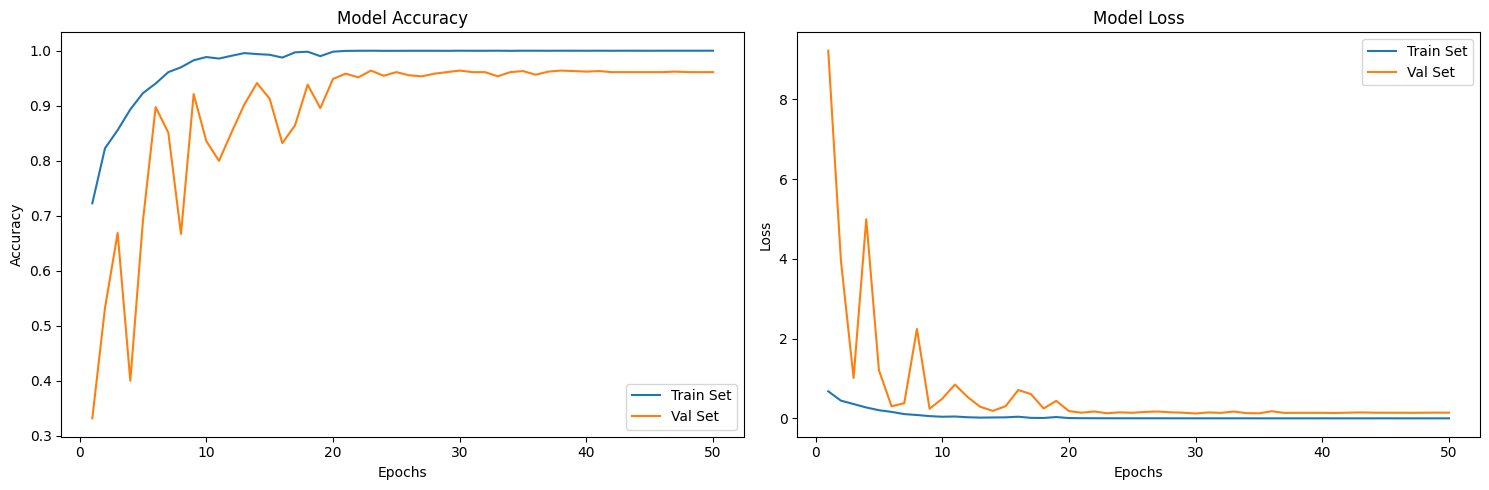

20/20 [==============================] - 0s 9ms/step - loss: 0.1309 - accuracy: 0.9560
Test Accuracy:  95.6
              precision    recall  f1-score   support

      glioma     0.9717    0.9615    0.9666       286
  meningioma     0.9091    0.9155    0.9123       142
   pituitary     0.9681    0.9785    0.9733       186

    accuracy                         0.9560       614
   macro avg     0.9496    0.9518    0.9507       614
weighted avg     0.9561    0.9560    0.9561       614



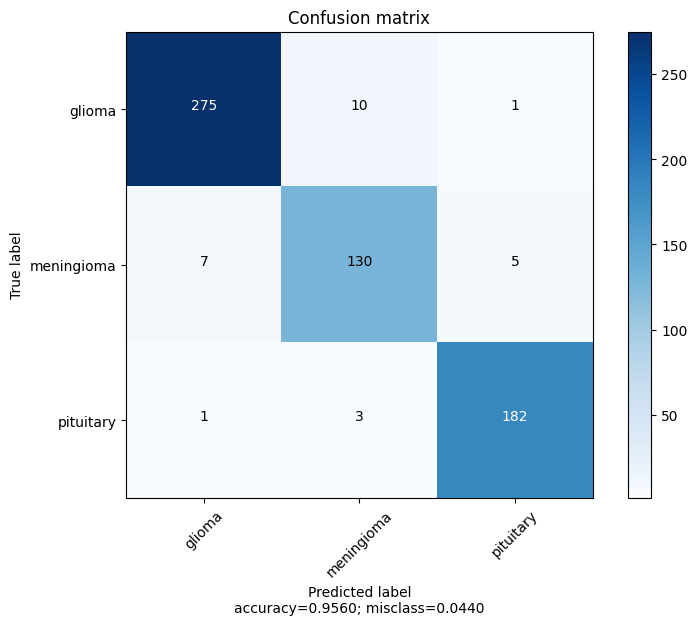

In [4]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

caX

In [12]:
def channel_attention(inputs, reduction=8):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // reduction, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def new_attention(inputs):

    b, h, w, c = inputs.shape.as_list()

    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(inputs)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(inputs)

    x = tf.reshape(x, [-1, 1, h*w])
    y = tf.reshape(y, [-1, 1, h*w])

    x = K.batch_dot(x, tf.reshape(inputs, [-1, h*w, c]))
    y = K.batch_dot(y, tf.reshape(inputs, [-1, h*w, c]))

    x = tf.reshape(x, [-1, 1, 1, c])
    y = tf.reshape(y, [-1, 1, 1, c])

    z = Multiply()([x, y])
    x = Activation('sigmoid')(z)

    y = channel_attention(inputs)
    x = Add()([x, y])
    
    x = Multiply()([x, inputs])

    return x

def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    x = Concatenate()([ Conv2D(32, 5, strides=4, padding='same')(y), x])
    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    k = ReLU()(x)

    x = MaxPooling2D()(k)
    x = Concatenate()([ Conv2D(32, 9, strides=8, padding='same')(y), Conv2D(64, 5, strides=4, padding='same')(z),  x])
    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    j = ReLU()(x)
    
    x = MaxPooling2D()(j)
    x = Concatenate()([ Conv2D(64, 9, strides=8, padding='valid')(z), Conv2D(128, 5, strides=4, padding='valid')(k),  x])
    x = Conv2D(512, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = new_attention(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.7861
Epoch 1: val_accuracy improved from -inf to 0.38710, saving model to model-test.h5
Epoch 1: 12.01 seconds
264/264 [==============================] - 12s 40ms/step - loss: 0.5114 - accuracy: 0.7862 - val_loss: 1.9942 - val_accuracy: 0.3871 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.2787 - accuracy: 0.8942
Epoch 2: val_accuracy did not improve from 0.38710
Epoch 2: 9.83 seconds
264/264 [==============================] - 10s 37ms/step - loss: 0.2786 - accuracy: 0.8942 - val_loss: 6.3845 - val_accuracy: 0.3757 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.9318
Epoch 3: val_accuracy improved from 0.38710 to 0.75617, saving model to model-test.h5
Epoch 3: 10.14 seconds
264/264 [==============================] - 10s 38ms/step - loss: 0.1837 - accuracy: 0.9318 - val_loss: 0.6298 - val_accuracy

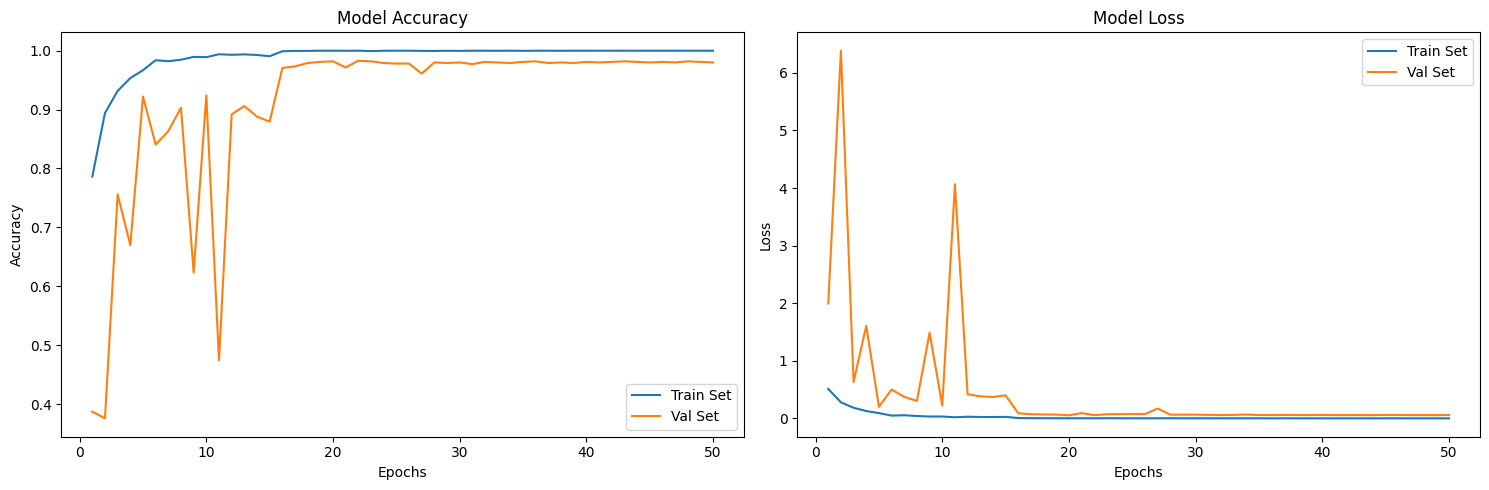

20/20 [==============================] - 0s 11ms/step - loss: 0.0849 - accuracy: 0.9691
Test Accuracy:  96.91
              precision    recall  f1-score   support

      glioma     0.9757    0.9825    0.9791       286
  meningioma     0.9247    0.9507    0.9375       142
   pituitary     0.9944    0.9624    0.9781       186

    accuracy                         0.9691       614
   macro avg     0.9649    0.9652    0.9649       614
weighted avg     0.9696    0.9691    0.9692       614



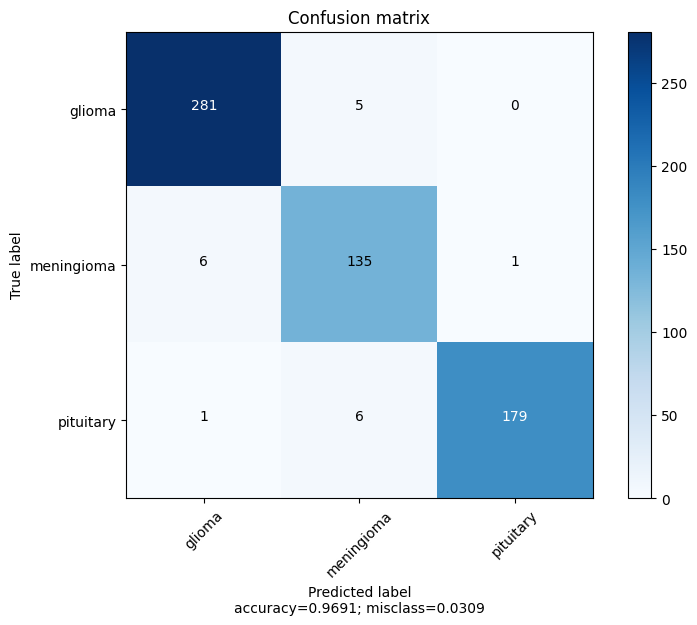

In [24]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

cXb

In [15]:
def block(inputs, filters):

    m = Conv2D(filters, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)

    a = Conv2D(filters, 3, padding='same')(inputs)
    a = BatchNormalization()(a)
    a = ReLU()(a)
    
    b = Concatenate()([m, a])

    d = Conv2D(filters * 2, 3, padding='same')(b)
    d = BatchNormalization()(d)
    d = ReLU()(d)

    d = Conv2D(filters * 2, 3, padding='same')(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    
    x = Concatenate()([b, d])

    m = Conv2D(filters*4, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)
    
    x = Add()([m, x])

    y = Conv2D(filters*2, 1)(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    
    return y




def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    x = Concatenate()([ Conv2D(32, 5, strides=4, padding='same')(y), x])
    k = block(x, 64)

    x = MaxPooling2D()(k)
    x = Concatenate()([ Conv2D(32, 9, strides=8, padding='same')(y), Conv2D(64, 5, strides=4, padding='same')(z),  x])
    j = block(x, 128)
    
    x = MaxPooling2D()(j)
    x = Concatenate()([ Conv2D(64, 9, strides=8, padding='valid')(z), Conv2D(128, 5, strides=4, padding='valid')(k),  x])
    x = block(x, 256)
    
    
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

Epoch 1/50
264/264 [==============================] - ETA: 0s - loss: 0.5455 - accuracy: 0.7754
Epoch 1: val_accuracy improved from -inf to 0.35104, saving model to model-test.h5
Epoch 1: 15.94 seconds
264/264 [==============================] - 16s 53ms/step - loss: 0.5455 - accuracy: 0.7754 - val_loss: 2.7674 - val_accuracy: 0.3510 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.3030 - accuracy: 0.8814
Epoch 2: val_accuracy improved from 0.35104 to 0.51992, saving model to model-test.h5
Epoch 2: 13.19 seconds
264/264 [==============================] - 13s 50ms/step - loss: 0.3027 - accuracy: 0.8814 - val_loss: 3.5915 - val_accuracy: 0.5199 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9266
Epoch 3: val_accuracy improved from 0.51992 to 0.76281, saving model to model-test.h5
Epoch 3: 13.18 seconds
264/264 [==============================] - 13s 50ms/step - loss: 0.1978 - accuracy: 0.92

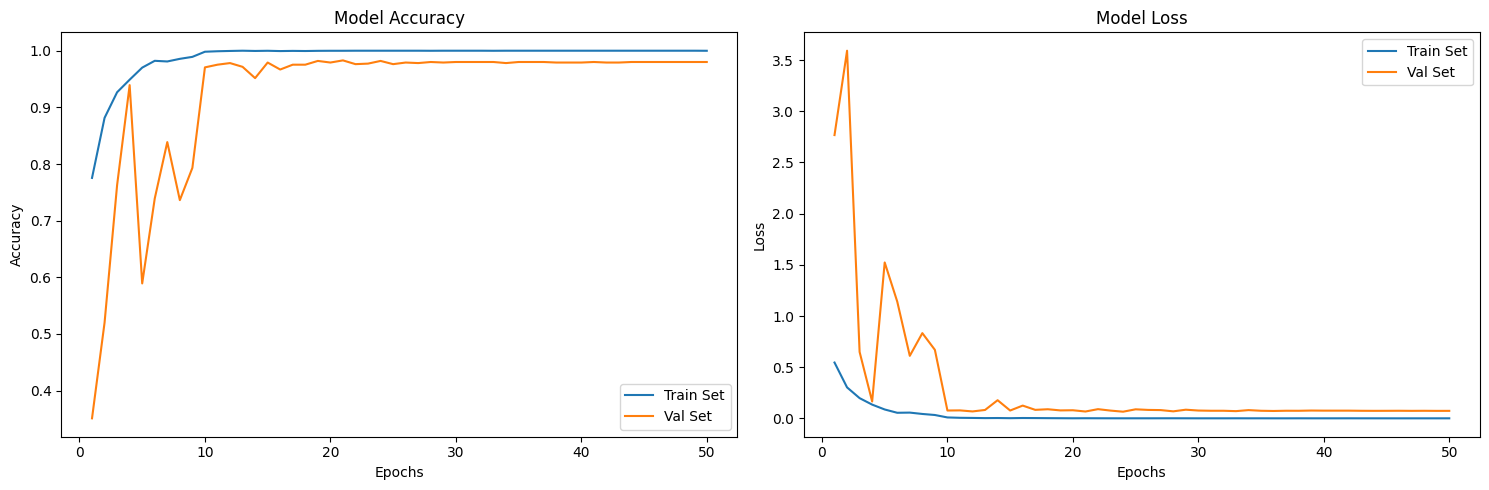

20/20 [==============================] - 0s 14ms/step - loss: 0.1067 - accuracy: 0.9674
Test Accuracy:  96.74
              precision    recall  f1-score   support

      glioma     0.9824    0.9755    0.9789       286
  meningioma     0.9189    0.9577    0.9379       142
   pituitary     0.9835    0.9624    0.9728       186

    accuracy                         0.9674       614
   macro avg     0.9616    0.9652    0.9632       614
weighted avg     0.9681    0.9674    0.9676       614



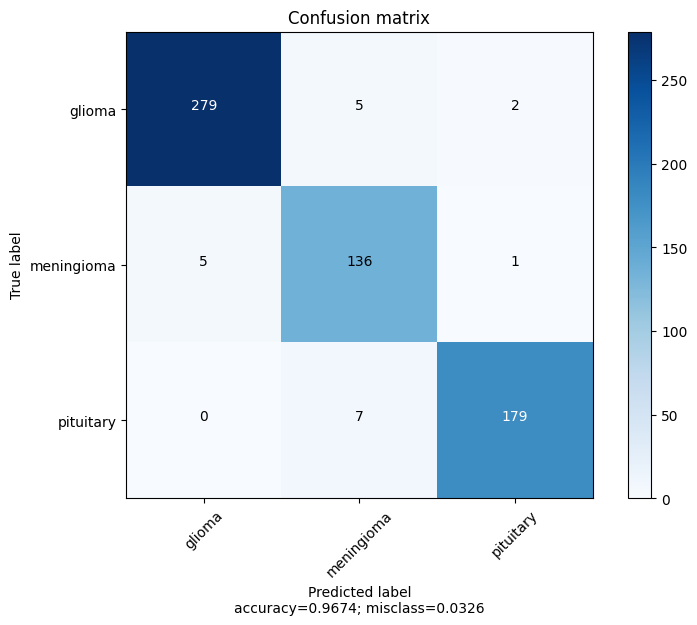

In [16]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

xab

In [17]:
def channel_attention(inputs, reduction=8):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // reduction, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def new_attention(inputs):

    b, h, w, c = inputs.shape.as_list()

    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(inputs)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(inputs)

    x = tf.reshape(x, [-1, 1, h*w])
    y = tf.reshape(y, [-1, 1, h*w])

    x = K.batch_dot(x, tf.reshape(inputs, [-1, h*w, c]))
    y = K.batch_dot(y, tf.reshape(inputs, [-1, h*w, c]))

    x = tf.reshape(x, [-1, 1, 1, c])
    y = tf.reshape(y, [-1, 1, 1, c])

    z = Multiply()([x, y])
    x = Activation('sigmoid')(z)

    y = channel_attention(inputs)
    x = Add()([x, y])
    
    x = Multiply()([x, inputs])

    return x

def block(inputs, filters):

    m = Conv2D(filters, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)

    a = Conv2D(filters, 3, padding='same')(inputs)
    a = BatchNormalization()(a)
    a = ReLU()(a)
    
    b = Concatenate()([m, a])

    d = Conv2D(filters * 2, 3, padding='same')(b)
    d = BatchNormalization()(d)
    d = ReLU()(d)

    d = Conv2D(filters * 2, 3, padding='same')(d)
    d = BatchNormalization()(d)
    d = ReLU()(d)
    
    x = Concatenate()([b, d])

    m = Conv2D(filters*4, 1, padding='same')(inputs)
    m = BatchNormalization()(m)
    m = ReLU()(m)
    
    x = Add()([m, x])

    y = Conv2D(filters*2, 1)(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    
    return y

def load_model():
    
    K.clear_session()
    inputs = Input(shape=(image_size, image_size, 3))
    
    x = Conv2D(32, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    y = ReLU()(x)

    x = MaxPooling2D()(y)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization()(x)
    z = ReLU()(x)

    x = MaxPooling2D()(z)
    k = block(x, 64)
    

    x = MaxPooling2D()(k)
    j = block(x, 128)
    
    x = MaxPooling2D()(j)
    x = block(x, 256)
    
    x = new_attention(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.5694 - accuracy: 0.7721
Epoch 1: val_accuracy improved from -inf to 0.34535, saving model to model-test.h5
Epoch 1: 12.43 seconds
264/264 [==============================] - 12s 41ms/step - loss: 0.5697 - accuracy: 0.7723 - val_loss: 2.2038 - val_accuracy: 0.3454 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8835
Epoch 2: val_accuracy improved from 0.34535 to 0.35674, saving model to model-test.h5
Epoch 2: 10.37 seconds
264/264 [==============================] - 10s 39ms/step - loss: 0.2996 - accuracy: 0.8837 - val_loss: 22.1485 - val_accuracy: 0.3567 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.1968 - accuracy: 0.9244
Epoch 3: val_accuracy improved from 0.35674 to 0.85579, saving model to model-test.h5
Epoch 3: 10.35 seconds
264/264 [==============================] - 10s 39ms/step - loss: 0.1966 - accuracy: 0.9

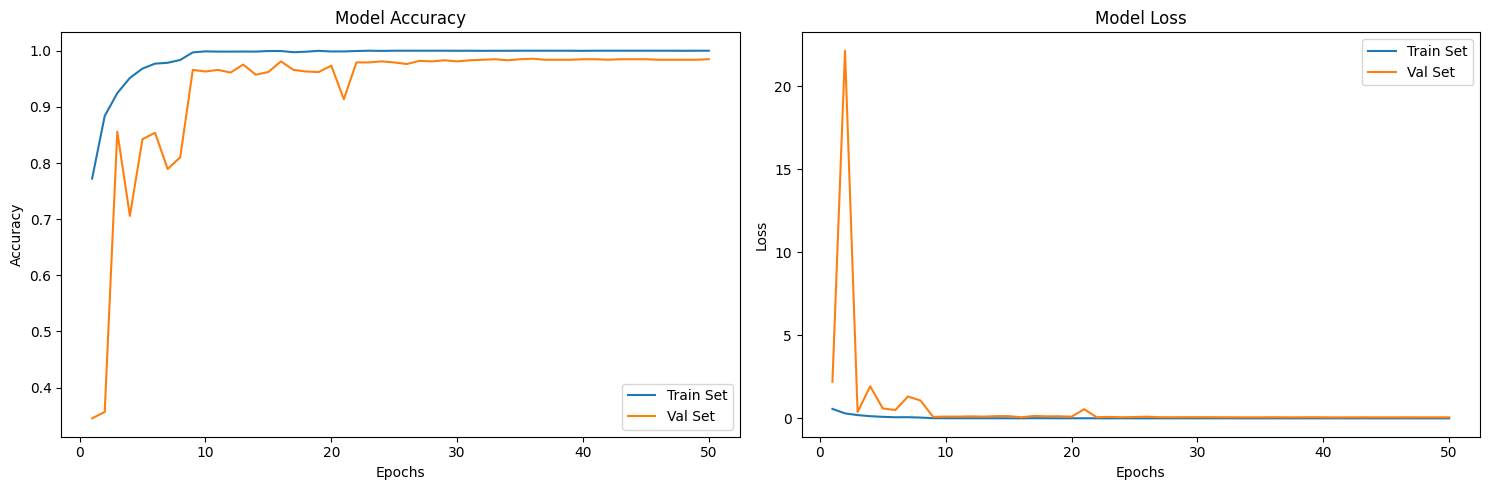

20/20 [==============================] - 0s 11ms/step - loss: 0.0940 - accuracy: 0.9642
Test Accuracy:  96.42
              precision    recall  f1-score   support

      glioma     0.9686    0.9720    0.9703       286
  meningioma     0.9500    0.9366    0.9433       142
   pituitary     0.9679    0.9731    0.9705       186

    accuracy                         0.9642       614
   macro avg     0.9622    0.9606    0.9614       614
weighted avg     0.9641    0.9642    0.9641       614



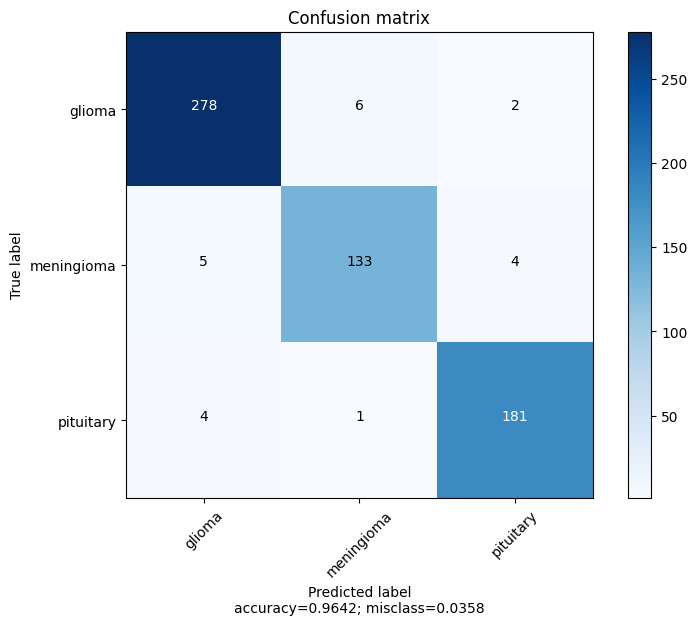

In [18]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-test.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)